In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
startup_data = pd.read_csv('50_Startups.csv')

In [3]:
startup_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startup_data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
startup_data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

### No null values in dataset.

# Checking correlation between features.

<Axes: >

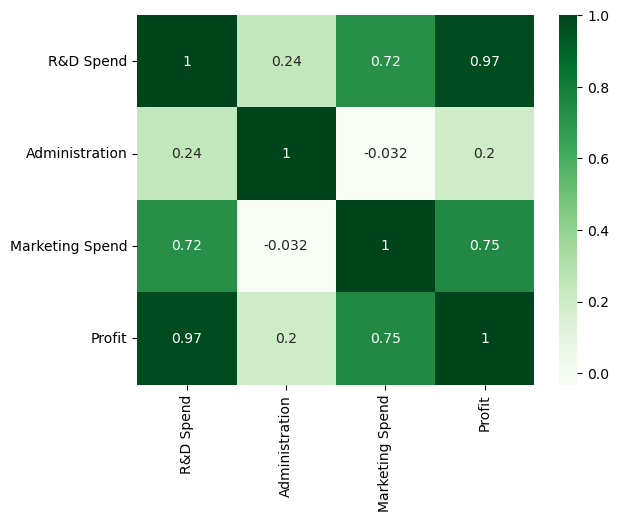

In [7]:
correlation = startup_data.corr(numeric_only = True)
sns.heatmap(correlation, cmap = 'Greens', annot= True)

In [8]:
X = startup_data[["Marketing Spend","R&D Spend", "Administration"]]
Y = startup_data['Profit']

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Using inbuilt Multi-Linear Regression model from scikit-learn.

In [10]:
lin_reg = LinearRegression()

In [11]:
lin_reg.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
test_preds = lin_reg.predict(X_test)

In [13]:
r2_score(Y_test, test_preds)

0.900065308303732

In [14]:
lin_reg.coef_

array([ 0.03124155,  0.80377928, -0.06792917])

In [15]:
lin_reg.intercept_

np.float64(54071.875745990794)

# Making my own Multi-Linear Regression model froms scratch.

In [16]:
class MultiLR:
    def __init__(self):
        self.coef = None
        self.intercept = None

    def fit(self, X_train, Y_train):
        X_train = np.insert(X_train, 0, 1, axis = 1)

        betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(Y_train)
        self.intercept = betas[0]
        self.coef = betas[1:]

    def predict(self, X_test):
        Y_pred = np.dot(X_test, self.coef) + self.intercept
        return Y_pred

In [17]:
Multi_lr = MultiLR()

In [18]:
Multi_lr.fit(X_train, Y_train)

In [19]:
np.insert(X_train, 0, 1, axis=1).shape

(40, 4)

In [20]:
test_preds = Multi_lr.predict(X_test)

In [21]:
r2_score(Y_test, test_preds)

0.9000653083037325

In [22]:
Multi_lr.coef

array([ 0.03124155,  0.80377928, -0.06792917])

In [23]:
Multi_lr.intercept

np.float64(54071.87574599096)

# Comparing the inbuilt model and the model made from scratch, we get the same accuracy, coefs and intercept.